<a href="https://colab.research.google.com/github/rizaho/ml_for_financial_analysis/blob/main/14_Stocks_Data_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from google.colab import drive
import seaborn as sns
%matplotlib inline
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
# read data from google drive
drive.mount('/content/drive')
DRIVE_DATASET_PATH = "/content/drive/My Drive/Colab Notebooks/Python & ML for Financial Analysis/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Helper Functions

## show_plot

In [ ]:
def show_plot(df, fig_title):
  df.plot(x='Date', figsize=(15, 7), linewidth=3, title=fig_title)
  plt.grid()
  plt.show()

## normalize

In [ ]:
def normalize(df):
  x = df.copy()
  for col in df.columns[1:]:
    x[col] = x[col] / x[col][0] # x[col][0] is the price of the first date. Note: df is sorted by date asc
  return x

## interactive_plot

In [ ]:
def interactive_plot(df ,in_title):
  fig = px.line(title = in_title)
  for col in df.columns[1:]:
    fig.add_scatter(x = df["Date"], y =df[col], name = col)
  fig.show()


## daily return

In [ ]:
def daily_return(df):

  daily_return = df.copy()

  for col in df.columns[1:]: # first column is date

    for row in range(1, len(df)): # first row does not have a yesterday value, so start from index 1
      today_value = df[col][row]
      yesterday_value = df[col][row-1]
      daily_return[col][row] = ((today_value - yesterday_value) / yesterday_value) * 100 # ratio to percentage


    daily_return[col][0] = 0 # # first row does not have a yesterday value, so it's value is 0

  return daily_return

# TASKS

In [ ]:
stocks_df = pd.read_csv(DRIVE_DATASET_PATH + "stock.csv")

In [ ]:
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# sort the stocks by date
stocks_df = stocks_df.sort_values(by = ['Date'])

print("# of stocks is {}".format(len(stocks_df.columns[1:])))
print("# of stock dates is {}".format(len(stocks_df[:])))

print("Name of the columns:")
for columnName in stocks_df.columns[1:]:
  print(columnName)

stocks_df


# of stocks is 9
# of stock dates is 2159
Name of the columns:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Average return of S&P500
stocks_df_only_stocks = stocks_df[stocks_df.columns[1:]]
avg_series = stocks_df_only_stocks.mean()
avg_df = pd.DataFrame({'name':avg_series.index, 'average':avg_series.values})
avg_df = avg_df.sort_values(by = ['average'])
avg_df.reset_index(drop=True, inplace=True)
print('Max average is {}'.format(avg_df['average'][len(avg_df)-1]))
print('Min average is {}'.format(avg_df['average'][0]))
avg_df


Max average is 2218.7495540592868
Min average is 23.10574339184808


,name,average
0,MGM,23.105743
1,T,35.162899
2,AAPL,140.819823
3,IBM,161.853001
4,BA,189.942700
5,TSLA,259.600815
6,GOOG,783.712512
7,AMZN,915.665665
8,sp500,2218.749554


In [ ]:
# Which one has the maximum volatility?
stock_std_sr = stocks_df_only_stocks.std()
avg_df = pd.DataFrame({'name':stock_std_sr.index, 'std':stock_std_sr.values})
avg_df = avg_df.sort_values(by = ["std"])
avg_df.reset_index(drop=True, inplace=True)
print("Max volatility is {}".format(max(avg_df["std"])))
avg_df

Max volatility is 697.838904933664


,name,std
0,T,3.207490
1,MGM,6.963847
2,IBM,25.561938
3,AAPL,70.827601
4,BA,103.678586
5,TSLA,210.988003
6,GOOG,334.448057
7,sp500,537.321727
8,AMZN,697.838905


In [ ]:
#What is the maximum price for AMZN stock over the specified time period?
max(stocks_df_only_stocks["AMZN"])


3225.0

# Task 3: EDA and Basic Visulaization

In [ ]:
# check for any null data
stocks_df_only_stocks.isnull().sum()

,0
AAPL,0
BA,0
T,0
MGM,0
AMZN,0
IBM,0
TSLA,0
GOOG,0
sp500,0


In [ ]:
stocks_df_only_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2159 non-null   float64
 1   BA      2159 non-null   float64
 2   T       2159 non-null   float64
 3   MGM     2159 non-null   float64
 4   AMZN    2159 non-null   float64
 5   IBM     2159 non-null   float64
 6   TSLA    2159 non-null   float64
 7   GOOG    2159 non-null   float64
 8   sp500   2159 non-null   float64
dtypes: float64(9)
memory usage: 151.9 KB


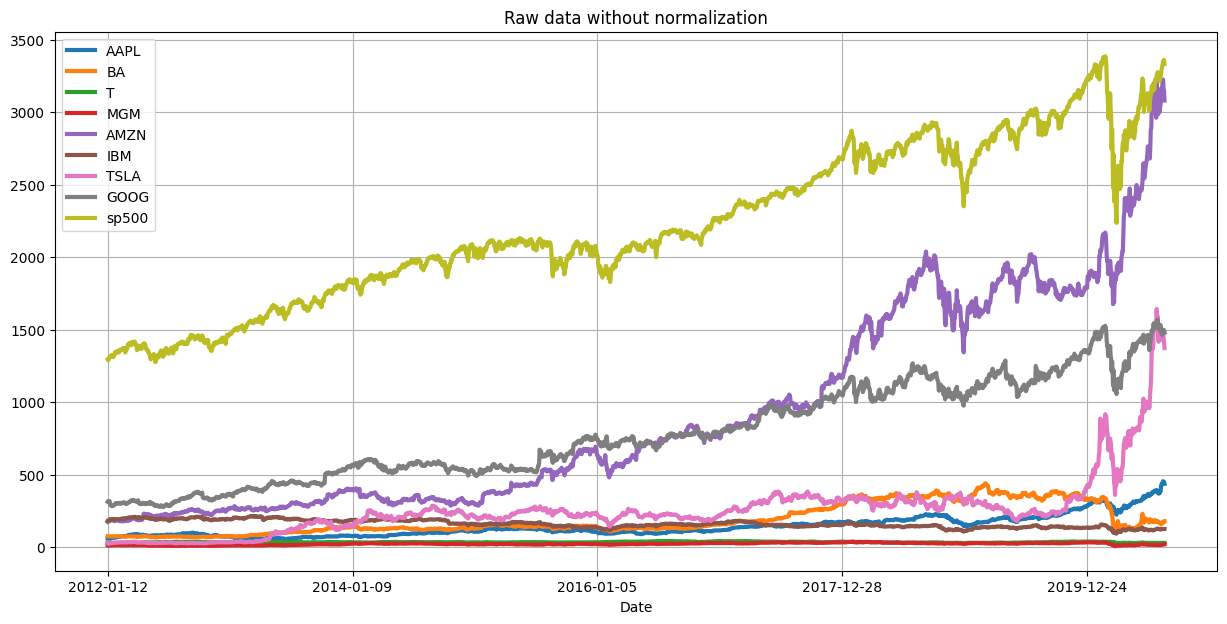

In [ ]:
show_plot(stocks_df, "Raw data without normalization")

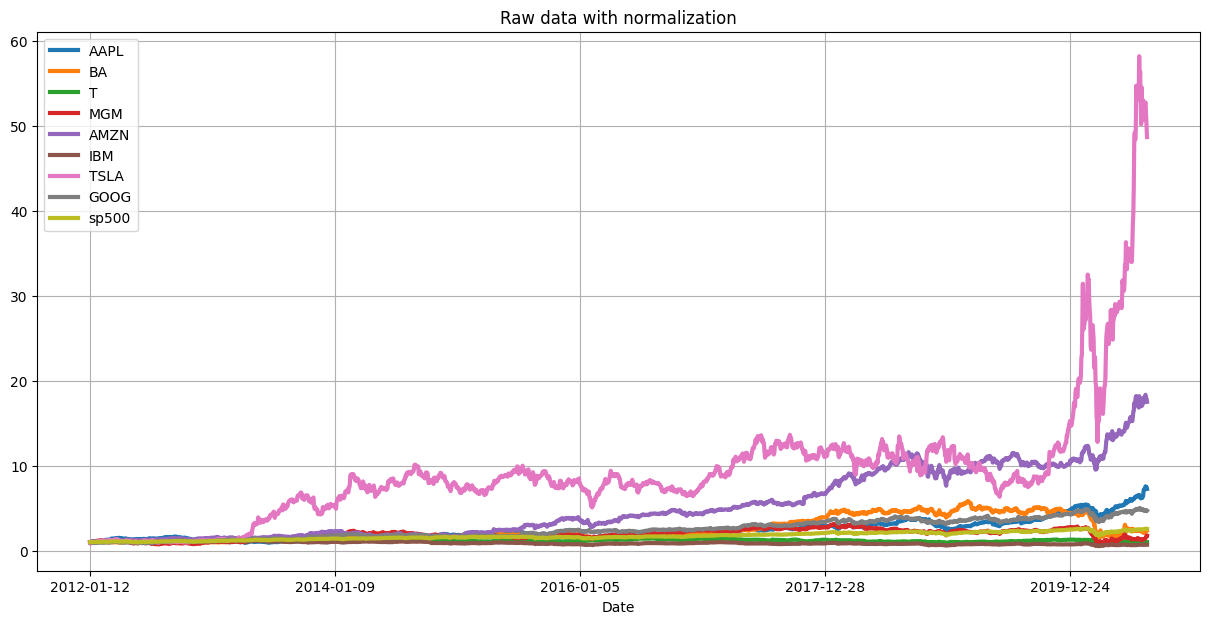

In [ ]:
# normalize the data so all will start from 1 (day 1)
normalized_stocks_df = normalize(stocks_df)
show_plot(normalized_stocks_df, "Raw data with normalization")

# Task 4: Interactive Data Visualization

In [ ]:
# int. without normalization
interactive_plot(stocks_df, "interactive, without normalization")

In [ ]:
# int. with normalization
interactive_plot(normalize(stocks_df), "interactive, with normalization")

# Task 6: Daily returns

In [ ]:
daily_return_df = daily_return(stocks_df)

Streaming output truncated to the last 5000 lines.

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<ipython-input-36-09c405b2cdb2>:10: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignmen

In [ ]:
daily_return_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


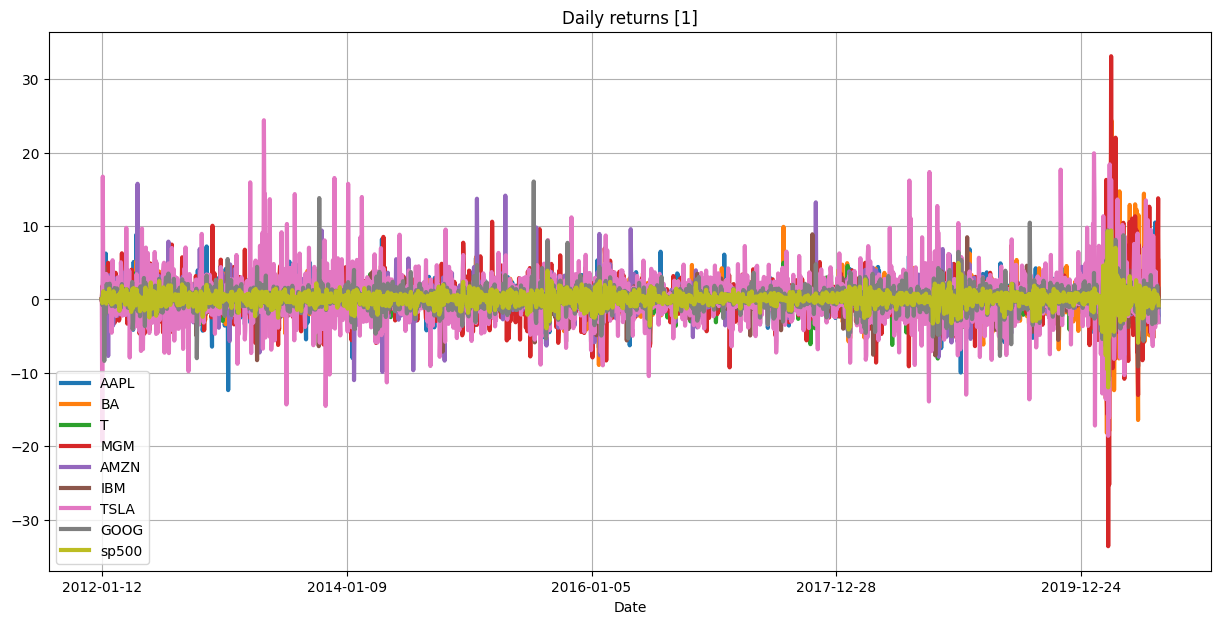

In [ ]:
# plot the daily returns in static and dynamic manner
show_plot(daily_return_df, "Daily returns [1]")
interactive_plot(daily_return_df, "Daily returns [2]")

# Task 7: Correlations between daily returns

In [ ]:

# Daily return correlation
correlation_df = daily_return_df.drop(columns = ["Date"])
daily_return_corr_matrix = correlation_df.corr()

<Axes: >

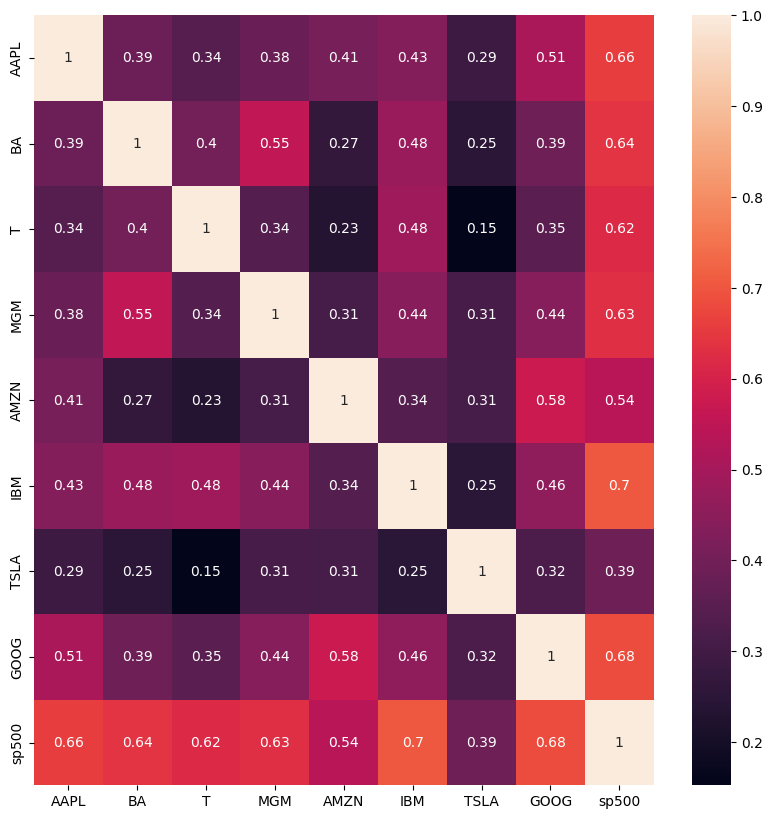

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(daily_return_corr_matrix, annot = True)

# Task 8: Histograms for daily returns

array([[<Axes: title={'center': 'AAPL'}>, <Axes: title={'center': 'BA'}>,
        <Axes: title={'center': 'T'}>],
       [<Axes: title={'center': 'MGM'}>,
        <Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'IBM'}>],
       [<Axes: title={'center': 'TSLA'}>,
        <Axes: title={'center': 'GOOG'}>,
        <Axes: title={'center': 'sp500'}>]], dtype=object)

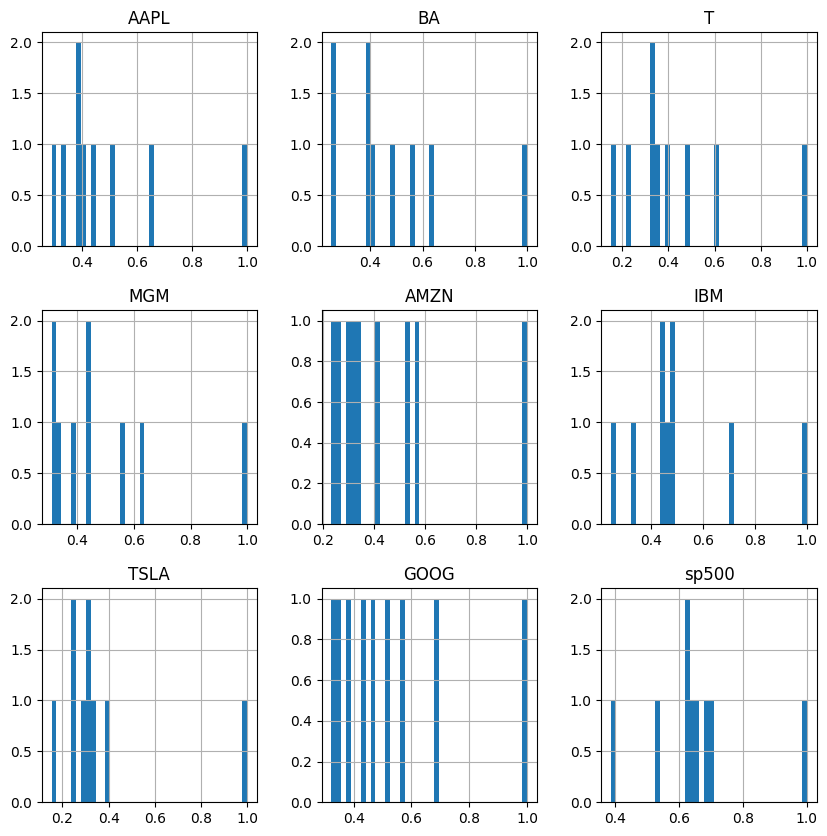

In [ ]:
daily_return_corr_matrix.hist(figsize=(10, 10), bins = 40)

In [ ]:
# interactive histogram for daily returns
df_hist = daily_return_df.copy()
df_hist = df_hist.drop(columns = ["Date"])

data = []
for col in df_hist.columns:
  data.append(daily_return_df[col].values)

data

fig = ff.create_distplot(data, df_hist.columns)
fig.show()